In [1]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae, r2_score as r
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split as splt
import seaborn as sns

In [2]:
data = pd.read_csv('medical_cost_prediction.csv')

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [7]:
model1 = LinearRegression()

In [8]:
x_train , x_test , y_train, y_test = splt(data['age'],data['charges'],test_size=0.3,random_state=42)

In [9]:
X_train = x_train.array.reshape(x_train.array.shape[0],-1)

In [10]:
model1.fit(X_train,y_train)

LinearRegression()

In [11]:
LinearRegression()

LinearRegression()

In [12]:
model1.predict([[16]])

array([7635.42969011])

In [13]:
y_pred = model1.predict(x_test.array.reshape(x_test.array.shape[0],-1))

In [14]:
r(y_test,y_pred)

0.10204905420336463

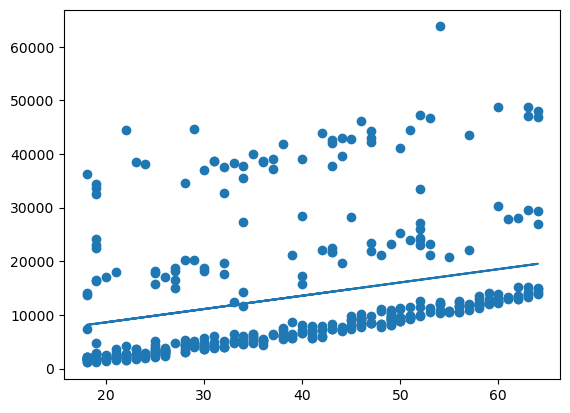

In [15]:
plt.plot(x_test,y_pred)
plt.scatter(x_test,y_test)
plt.show()

In [17]:
mask = data.dtypes == np.object
categorical_cols = data.columns[mask]
categorical_cols

C:\Users\rajes\AppData\Local\Temp\ipykernel_19524\675950291.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = data.dtypes == np.object


Index(['sex', 'smoker', 'region'], dtype='object')

In [18]:
# Determine how many extra columns would be created
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))

print(num_ohc_cols)

region    4
sex       2
smoker    2
dtype: int64


In [19]:
# Copy of the data
data_ohc = data.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(np.int)
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]
    print(col_names)
    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

C:\Users\rajes\AppData\Local\Temp\ipykernel_19524\1716699235.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dat = le.fit_transform(data_ohc[col]).astype(np.int)
C:\Users\rajes\AppData\Local\Temp\ipykernel_19524\1716699235.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, che

['region_0', 'region_1', 'region_2', 'region_3']
['sex_0', 'sex_1']
['smoker_0', 'smoker_1']


C:\Users\rajes\AppData\Local\Temp\ipykernel_19524\1716699235.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dat = le.fit_transform(data_ohc[col]).astype(np.int)


In [20]:
data_ohc

,age,bmi,children,charges,region_0,region_1,region_2,region_3,sex_0,sex_1,smoker_0,smoker_1
0,19,27.900,0,16884.92400,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1335,18,36.850,0,1629.83350,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [21]:
X = data_ohc.drop('charges', axis=1)
y = data_ohc['charges']

In [22]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = splt(X_pf, y, test_size=0.3,random_state=42)


In [24]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [25]:
lr = LinearRegression()
lr.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = lr.predict(X_test_s)

In [26]:
r(y_test,y_pred)


0.8612434735289989

In [27]:
mae(y_test,y_pred)


2591.861327566776

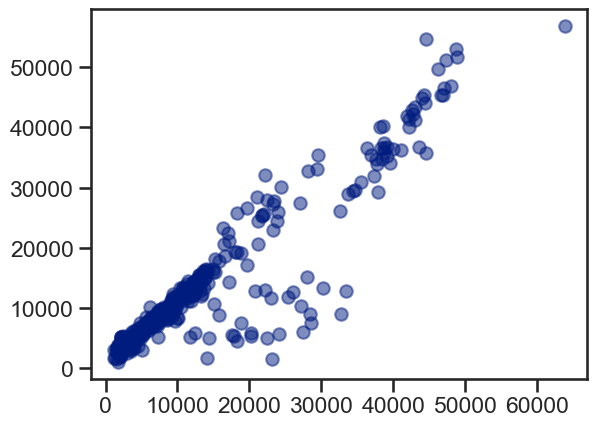

In [28]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()
ax.scatter(y_test, y_pred, alpha=.5)

In [29]:
las007 = Lasso(alpha = 1, max_iter=1000000)
las007.fit(X_train_s, y_train)
y_pred = las007.predict(X_test_s)

In [30]:
r(y_test,y_pred)


0.8607149125979952

In [31]:
red = Ridge(alpha = 1)
red.fit(X_train_s, y_train)
y_pred_r = red.predict(X_test_s)

In [32]:
r(y_test,y_pred_r)


0.8606769750922282

In [33]:
mae(y_test,y_pred_r)


2688.9608789191293